# Error analysis notebook - lambdamart, seed 0, test data

## Import packages

In [4]:
import pandas as pd
import math

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from elasticsearch import Elasticsearch

import warnings
import matplotlib
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
warnings.filterwarnings("ignore")

from enum import IntEnum



# lambdamart, seed=0

## Set filepaths

In [16]:
ehllm = '../evaluation/resources/2020/eval_results/lambdamart2020_train_seed0hlevel_random_state=0.tsv'
ellm = '../evaluation/resources/2020/eval_results/lambdamart2020_train_seed0level_random_state=0.tsv'

In [24]:
ehlp = '../evaluation/resources/2020/eval_results/p_controller_train_nle_meta_9_1_train_hlevel.tsv'
elp = '../evaluation/resources/2020/eval_results/p_controller_train_nle_meta_9_1_train_level.tsv'

## Prepare dataframes

In [25]:
# eval result dfs
ehllmdf = pd.read_csv(ehllm, sep='\t', names=['key', 'qid', 'value'])
ehllmdf = ehllmdf.pivot(index='qid', columns='key', values='value')

ellmdf = pd.read_csv(ellm, sep='\t', names=['key', 'qid', 'value'])
ellmdf = ellmdf.pivot(index='qid', columns='key', values='value')


In [27]:
# eval result dfs
ehlpdf = pd.read_csv(ehlp, sep='\t', names=['key', 'qid', 'value'])
ehlpdf = ehlpdf.pivot(index='qid', columns='key', values='value')

elpdf = pd.read_csv(elp, sep='\t', names=['key', 'qid', 'value'])
elpdf = elpdf.pivot(index='qid', columns='key', values='value')

In [28]:
elmdf = pd.merge(ehllmdf.sort_values(by='difference').reset_index().reset_index(),ellmdf.sort_values(by='difference').reset_index().reset_index(),on='qid')
elmdf = elmdf.rename({'index_x':'difficulty hlevel', 'index_y':'difficulty econ level'},axis=1)


elmdf['difference'] = elmdf.apply(lambda row: (row.difference_x + row.difference_y)/2, axis=1)
elmdf['disparity'] = elmdf.apply(lambda row: (row.disparity_x + row.disparity_y)/2, axis=1)
elmdf['relevance'] = elmdf.apply(lambda row: (row.relevance_x + row.relevance_y)/2, axis=1)

elmdf = elmdf.sort_values(by='difference')[['qid','difference', 'disparity', 'relevance']]
elmdf.head()

key,qid,difference,disparity,relevance
0,82442,0.000000,1.868049,1.868091
1,49868,0.000405,1.885017,1.864012
3,69,0.000478,1.890495,1.871465
2,107238,0.000609,1.869202,1.835515
4,3661,0.000743,1.804429,1.778329


In [29]:
epdf = pd.merge(ehlpdf.sort_values(by='difference').reset_index().reset_index(),elpdf.sort_values(by='difference').reset_index().reset_index(),on='qid')
epdf = epdf.rename({'index_x':'difficulty hlevel', 'index_y':'difficulty econ level'},axis=1)


epdf['difference'] = epdf.apply(lambda row: (row.difference_x + row.difference_y)/2, axis=1)
epdf['disparity'] = epdf.apply(lambda row: (row.disparity_x + row.disparity_y)/2, axis=1)
epdf['relevance'] = epdf.apply(lambda row: (row.relevance_x + row.relevance_y)/2, axis=1)

epdf = epdf.sort_values(by='difference')[['qid','difference', 'disparity', 'relevance']]
epdf.head()

key,qid,difference,disparity,relevance
0,132049,0.002713,1.421254,1.403715
1,71096,0.027807,1.974314,1.862491
3,15395,0.033729,2.044128,1.889445
2,21984,0.051934,1.441575,1.299282
4,52728,0.078204,1.029654,0.784137


In [51]:
elmdf.difference.mean()

0.7012728749999999

In [50]:
epdf.difference.mean()

0.43059560500000005

In [32]:
dif_disp_rel_lm = elmdf.reset_index(drop=True).reset_index().rename({'index':'difficulty'}, axis=1)
disp = dif_disp_rel_lm[["difficulty","disparity"]].rename({'disparity':'value'}, axis=1)
relp = dif_disp_rel_lm[["difficulty","relevance"]].rename({'relevance':'value'}, axis=1)
concatenated_lm = pd.concat([disp.assign(metric='disparity'), relp.assign(metric='relevance')])
concatenated_lm.head()


key,difficulty,value,metric
0,0,1.868049,disparity
1,1,1.885017,disparity
2,2,1.890495,disparity
3,3,1.869202,disparity
4,4,1.804429,disparity


In [33]:
dif_disp_rel_p = epdf.reset_index(drop=True).reset_index().rename({'index':'difficulty'}, axis=1)
disp = dif_disp_rel_p[["difficulty","disparity"]].rename({'disparity':'value'}, axis=1)
relp = dif_disp_rel_p[["difficulty","relevance"]].rename({'relevance':'value'}, axis=1)
concatenated_p = pd.concat([disp.assign(metric='disparity'), relp.assign(metric='relevance')])
concatenated_p.head()


key,difficulty,value,metric
0,0,1.421254,disparity
1,1,1.974314,disparity
2,2,2.044128,disparity
3,3,1.441575,disparity
4,4,1.029654,disparity


In [38]:
concatenated = pd.concat([concatenated_lm.assign(ranker='lm'), concatenated_p.assign(ranker='p-controller')])


In [40]:
concatenated['label'] = concatenated.apply(lambda df: f"{df.metric}, {df.ranker}",axis=1)

Text(0.5, 0.98, 'Relevance and disparity versus difficulty')

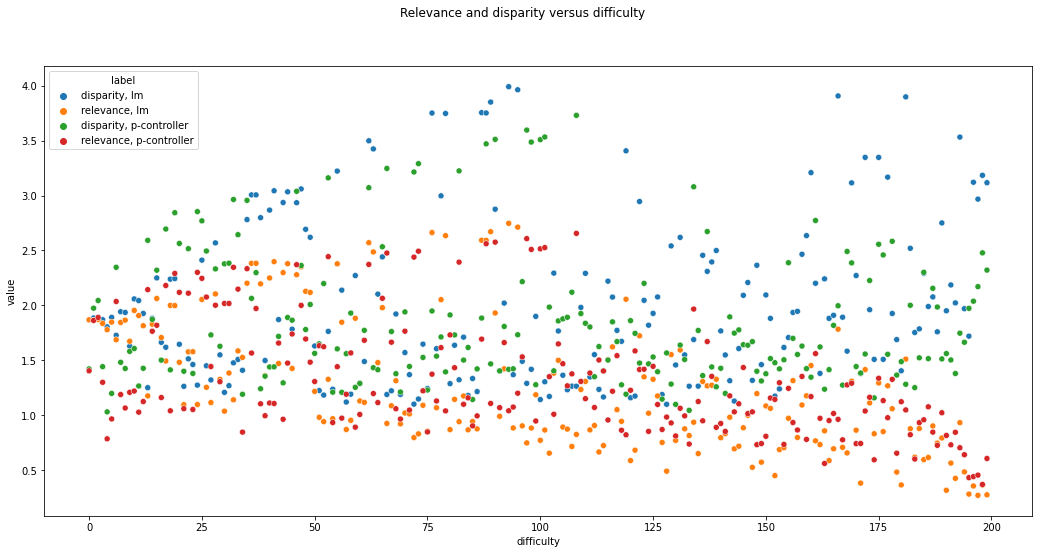

In [41]:
fig, ax = plt.subplots(1,1,figsize = (17.7,8.27))
# ax2 = ax.twinx()

pi = iter(sns.color_palette())
f = next(pi)
s = next(pi)

sns.scatterplot(data=concatenated, x='difficulty', y='value',hue='label',ax=ax)




fig.suptitle('Relevance and disparity versus difficulty')

Text(0.5, 0.98, 'Relevance ')

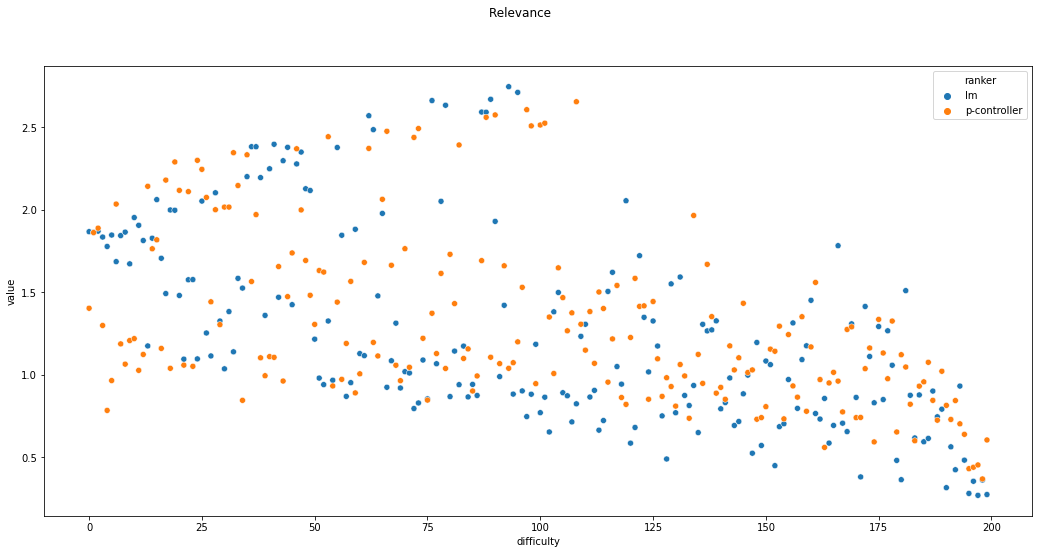

In [46]:
fig, ax = plt.subplots(1,1,figsize = (17.7,8.27))

sns.scatterplot(data=concatenated[concatenated.metric == 'relevance'], x='difficulty', y='value',hue='ranker',ax=ax)




fig.suptitle('Relevance ')

Text(0.5, 0.98, 'Disparity')

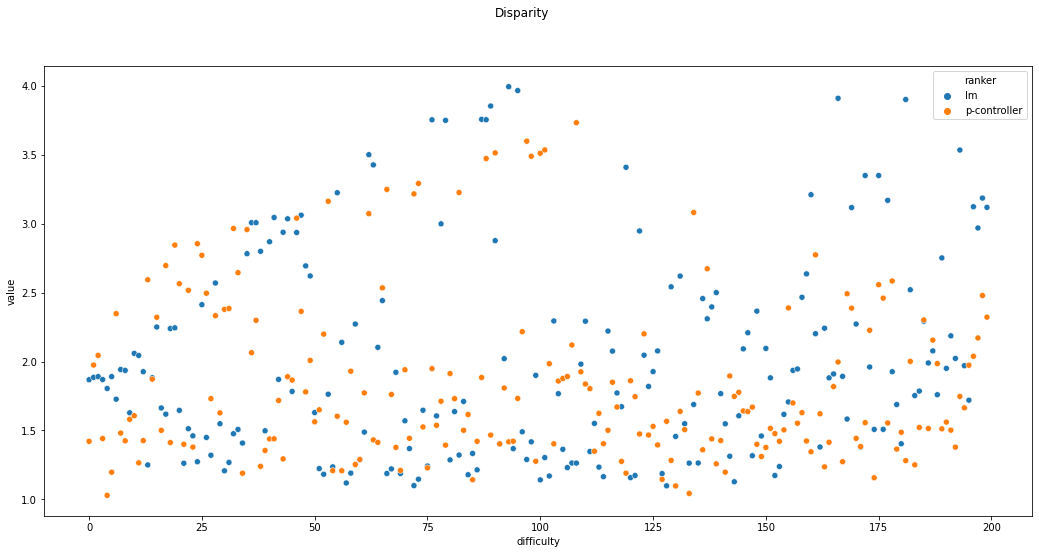

In [48]:
fig, ax = plt.subplots(1,1,figsize = (17.7,8.27))

sns.scatterplot(data=concatenated[concatenated.metric == 'disparity'], x='difficulty', y='value',hue='ranker',ax=ax)




fig.suptitle('Disparity')

# Bibliography

[1] Buckley, ‘Reliable Information Access Final Workshop Report’.